In [108]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [109]:
train_df=pd.read_csv("data/housing/train.csv")
test_df=pd.read_csv("data/housing/test.csv")
submission_df=pd.read_csv("data/housing/sample_submission.csv")

In [110]:
train_df.head(10)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


# [ 연습문제 ]
1) grade 컬럼 값이 유일한게 몇개가 있는지 출력해보세요.

In [111]:
train_df['grade'].nunique()

12

2) 각 컬럼 별로 갖고 있는 unique 데이터의 개수를 출력해보세요.

In [112]:
for col in train_df:
    print(col, "==> ",train_df[col].nunique())

id ==>  15035
date ==>  365
price ==>  3263
bedrooms ==>  11
bathrooms ==>  29
sqft_living ==>  863
sqft_lot ==>  7678
floors ==>  6
waterfront ==>  2
view ==>  5
condition ==>  5
grade ==>  12
sqft_above ==>  789
sqft_basement ==>  271
yr_built ==>  116
yr_renovated ==>  65
zipcode ==>  70
lat ==>  4692
long ==>  716
sqft_living15 ==>  682
sqft_lot15 ==>  6958


3) 시각화 : 가격, 등급, 침실개수, 건평, 대지평

C:\Users\B-17\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\B-17\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\B-17\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1008x720 with 0 Axes>

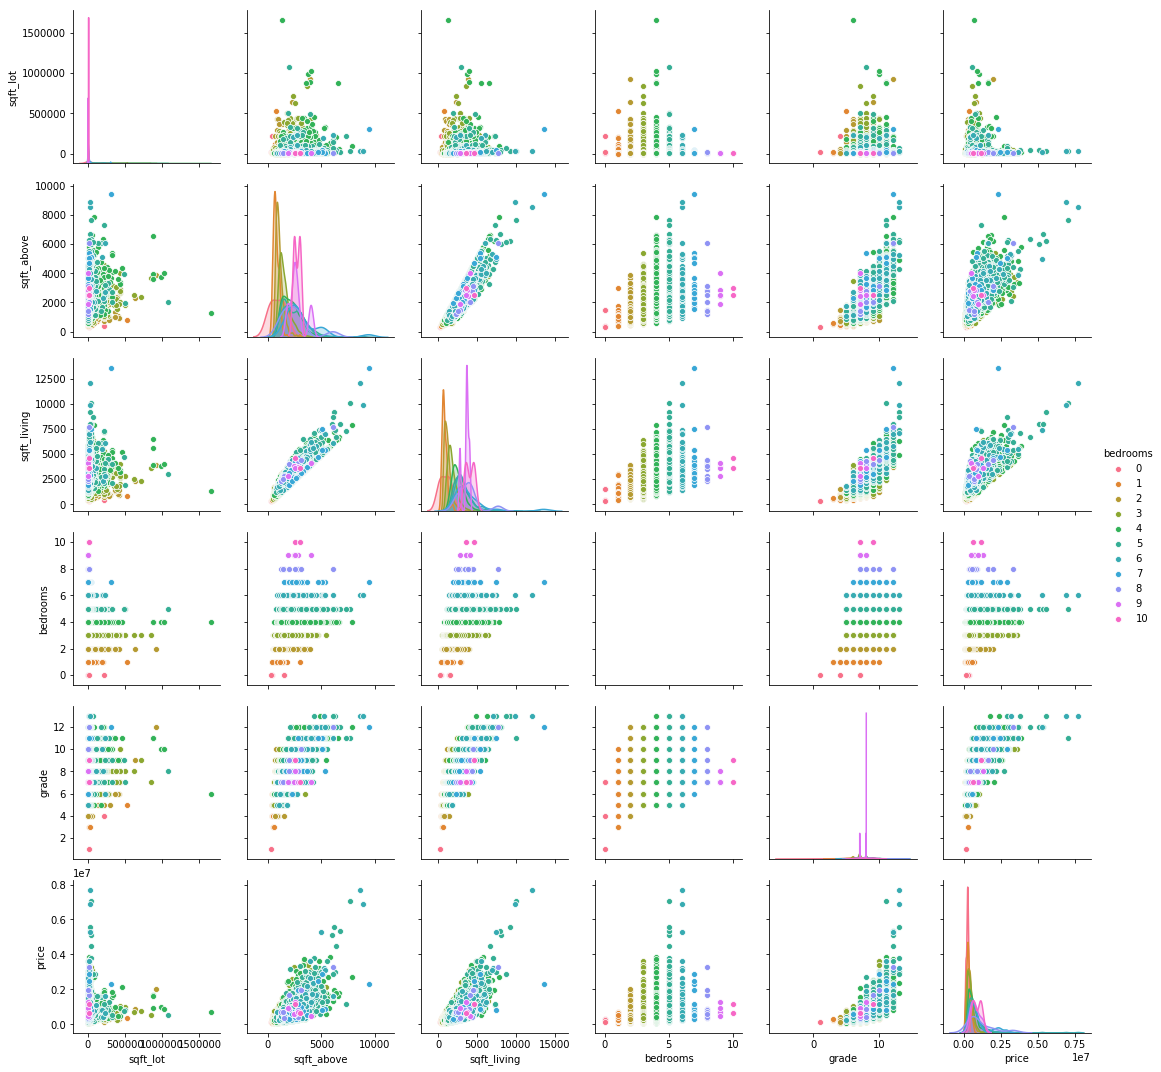

In [113]:
cols=['sqft_lot','sqft_above','sqft_living','bedrooms','grade','price']
plt.figure(figsize=(14,10))
sns.pairplot(train_df[cols],hue="bedrooms")

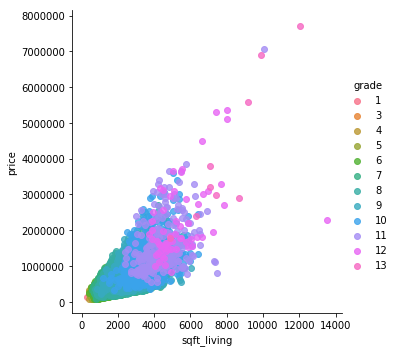

In [114]:
sns.lmplot(data=train_df, x='sqft_living', y='price', hue="grade", fit_reg=False)

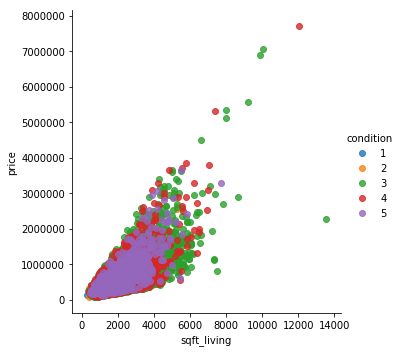

In [115]:
sns.lmplot(data=train_df, x='sqft_living', y='price', hue="condition", fit_reg=False)

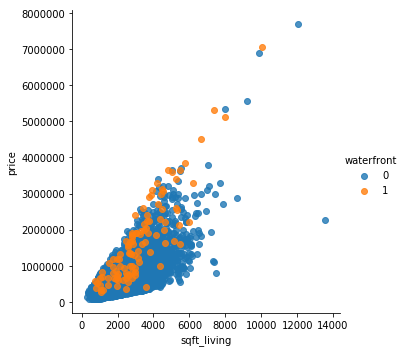

In [116]:
sns.lmplot(data=train_df, x='sqft_living', y='price', hue="waterfront", fit_reg=False)

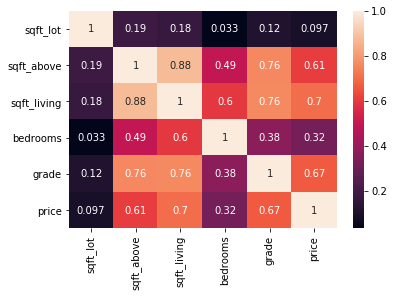

In [117]:
#train_df[cols].corr()
sns.heatmap(data=train_df[cols].corr(), annot=True)

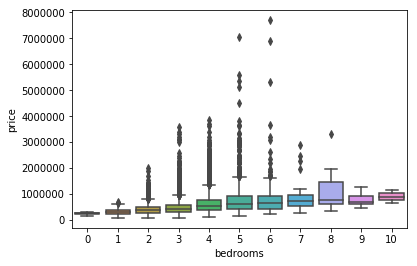

In [118]:
# 방의 개수에 따른 주택 가격을 boxplot을 그려서 확인해보자
sns.boxplot(x=train_df['bedrooms'], y=train_df['price'])

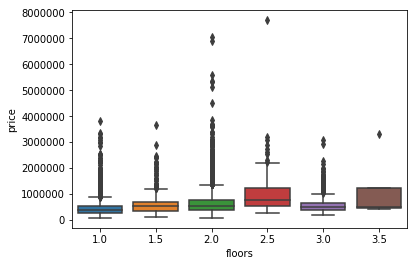

In [119]:
sns.boxplot(x=train_df['floors'], y=train_df['price'])

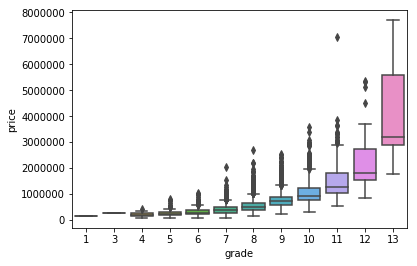

In [120]:
sns.boxplot(x=train_df['grade'], y=train_df['price'])

[Text(0.5, 0, 'sqft_living'), Text(0.5, 0, 'bedrooms'), Text(0.5, 0, 'floors')]

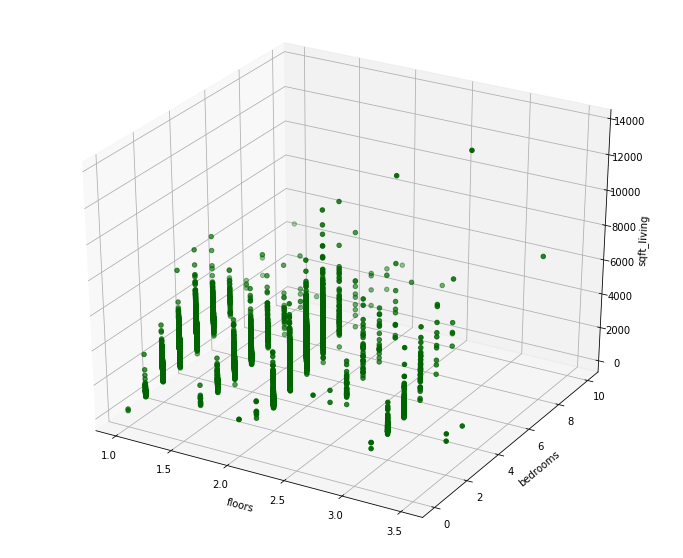

In [121]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(train_df['floors'], train_df['bedrooms'], train_df['sqft_living'], c="darkgreen")
ax.set(xlabel="floors", ylabel="bedrooms", zlabel="sqft_living")

# Linear Regression Model

In [122]:
train_df.shape
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


## 필요없는 컬럼 제거

In [123]:
train_df.drop(['id','date'], axis=1, inplace=True)

In [124]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(14)
memory usage: 2.2 MB


#### test / train 데이터 나누기

In [125]:
train_df_part1, train_df_part2 = train_test_split(train_df, train_size=0.7, random_state=42 )

C:\Users\B-17\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [126]:
train_df.shape

(15035, 19)

In [127]:
train_df_part1.shape

(10524, 19)

In [128]:
train_df_part2.shape

(4511, 19)

In [129]:
model=LinearRegression()
model.fit(train_df_part1[['sqft_living']], train_df_part1[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
predicted=model.predict(train_df_part2[['sqft_living']])
predicted

array([[ 367157.06722055],
       [ 494289.51360297],
       [ 346931.45075062],
       ...,
       [1485344.72062951],
       [ 552076.98923134],
       [ 893023.09543872]])

### 예측값과 실제값사이의 score계산
=> 결정 계수( R^2 )
* 0<= R^2 <=1
* R^2 = (Q-Qe)/Q
* Q : 전체 데이터의 편차들을 제곱해서 합한 값
* Qe : 전체 데이터의 잔차들을 제곱해서 합한 값
* ==> R^2가 1에 가까울수록 '예측값과 실제값이 비슷하다' (설명력이 크다)
* ==> R^2가 0에 가까울수록 '예측값과 실제값이 다르다' (설명력이 작다)

In [131]:
# traingin  data로 만든 선형회귀모델(model)에 테스트 데이터를 입력해서 결과를 얻어낸 다음
# 테스트의 답과 예측값 사이의 score(결정계수)를 구함.

score=model.score(train_df_part2[['sqft_living']], train_df_part2[['price']])
print("점수는 : ",format(score,'.3f'))

점수는 :  0.469


#### 하우스 가격 = w*sqft_living+b
선형 모델 직선의 기울기(w)와 상수(b)를 출력

In [132]:
print("Intercept : {}".format(model.intercept_))
print("Coefficient : {}".format(model.coef_))

Intercept : [-60470.25242938]
Coefficient : [[288.93737814]]


    Intercept : [-60470.25242938]
    Coefficient : [[288.93737814]]
    ==> 가설함수(하우스 가격) = 288.9373 * sqft_living + (-60470.2524)

In [133]:
print("2000평인 집의 가격은 ? ", format(model.predict(2000)[0][0],'.3f'), "원")

2000평인 집의 가격은 ?  517404.504 원


## Multi-Variables(Multiple) Linear Regression
### 면적, 방의 개수, 화장실 개수에 따른 집 가격 예측하기

In [134]:
features=['sqft_living','bedrooms','bathrooms']

In [135]:
model2=LinearRegression()
model2.fit(train_df_part1[features], train_df_part1['price'])
score=model2.score(train_df_part2[features], train_df_part2['price'])
print("점수는 : ", score)

점수는 :  0.4832220701273626


In [136]:
features=['sqft_living','bedrooms','bathrooms','sqft_lot','floors']
train_df_part1.info()
model3=LinearRegression()
model3.fit(train_df_part1[features], train_df_part1['price'])
score=model3.score(train_df_part2[features], train_df_part2['price'])
print("점수는 : ", score)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10524 entries, 8177 to 7270
Data columns (total 19 columns):
price            10524 non-null float64
bedrooms         10524 non-null int64
bathrooms        10524 non-null float64
sqft_living      10524 non-null int64
sqft_lot         10524 non-null int64
floors           10524 non-null float64
waterfront       10524 non-null int64
view             10524 non-null int64
condition        10524 non-null int64
grade            10524 non-null int64
sqft_above       10524 non-null int64
sqft_basement    10524 non-null int64
yr_built         10524 non-null int64
yr_renovated     10524 non-null int64
zipcode          10524 non-null int64
lat              10524 non-null float64
long             10524 non-null float64
sqft_living15    10524 non-null int64
sqft_lot15       10524 non-null int64
dtypes: float64(5), int64(14)
memory usage: 1.6 MB
점수는 :  0.4840569333415088


In [137]:
features=['sqft_living','bedrooms','bathrooms','sqft_lot','floors','waterfront','view','grade','yr_built']

model4=LinearRegression()
model4.fit(train_df_part1[features], train_df_part1['price'])
score=model4.score(train_df_part2[features], train_df_part2['price'])
print("점수는 : ", score)

점수는 :  0.6490165419035652


# 오늘 목표 :score 0.7이상으로 만들기!!
* 이상치 제거
* feature 조정
* 값을 구간으로 나눠보는건 어떨까?
* 정규화/표준화를 해보는건 어떨까?
* 원핫인코딩 사용
-----------------------------------------
위에까지는 배운 내용
* 딥러닝 사용


=> 파생변수 고려? 입력 변수로부터 특정 연산을 수행하여 생성한 변수

## 연습문제
    tensorflow를 사용해서 선형회귀모델을 생성해라
    학습데이터 : train_df_part1 / 테스트데이터 : train_df_part2
    입력변수 : sqft_living
    출력변수 : price

In [151]:
train_df_part1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [157]:
features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

## CASE 1 : LinearRegression

In [158]:
model4=LinearRegression()
model4.fit(train_df_part1[features], train_df_part1['price'])
score=model4.score(train_df_part2[features], train_df_part2['price'])
print("점수는 : ", score)

점수는 :  0.6930577917419907


## CASE 2 : RandomForest

In [155]:

rfModel=RandomForestRegressor(random_state=42, n_estimators=50)
rfModel.fit(train_df_part1[features], train_df_part1['price'])
score=rfModel.score(train_df_part2[features], train_df_part2['price'])
print(score)

0.8464176926636398


## 버섯 분류하기 , 타이타닉 분류하기

In [165]:
mush=pd.read_csv("data/mushrooms.csv")

### train / test 데이터 나누기

In [167]:
mush_train, mush_test = train_test_split(mush, train_size=0.7, random_state=42 )

C:\Users\B-17\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [173]:
mush_train.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
250,e,f,y,y,t,a,f,c,b,w,...,y,w,w,p,w,o,p,n,y,g
7256,p,k,y,e,f,f,f,c,n,b,...,s,w,p,p,w,o,e,w,v,d
1353,e,f,s,n,f,n,f,w,b,k,...,f,w,w,p,w,o,e,n,a,g
98,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,n,s,g
204,e,f,y,n,t,l,f,c,b,n,...,y,w,w,p,w,o,p,k,y,p
653,p,x,y,n,t,p,f,c,n,w,...,s,w,w,p,w,o,p,k,s,g
7318,p,k,s,e,f,s,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
3431,e,f,y,g,t,n,f,c,b,n,...,s,p,w,p,w,o,p,k,v,d
3160,e,f,f,e,t,n,f,c,b,w,...,s,w,g,p,w,o,p,k,y,d
7260,e,x,s,g,f,n,f,w,b,w,...,s,w,w,p,w,t,p,w,n,g


In [176]:
mush_trainX=mush_train.iloc[:,1:]
mush_trainY=mush_train.iloc[:,0]
mush_testX=mush_test.iloc[:,1:]
mush_testY=mush_test.iloc[:,0]

### Data 확인

In [177]:
print(mush_trainX.head())
print(mush_trainY.head())
print(mush_testX.head())
print(mush_testY.head())

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
5921         x           s         b       t    f               f   
1073         x           f         g       t    n               f   
3710         x           f         g       f    f               f   
144          x           y         y       t    a               f   
5469         x           y         n       f    y               f   

     gill-spacing gill-size gill-color stalk-shape  ...  \
5921            c         b          h           t  ...   
1073            c         b          p           t  ...   
3710            c         b          p           e  ...   
144             c         b          k           e  ...   
5469            c         n          b           t  ...   

     stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
5921                        f                      w                      w   
1073                        s                      p                    

--------------------------------------------------------------

## CASE 0 : Linear Regression

In [138]:
features=['sqft_living','bedrooms','bathrooms','sqft_lot','floors','waterfront','view','grade','yr_built']

model4=LinearRegression()
model4.fit(train_df_part1[features], train_df_part1['price'])
score=model4.score(train_df_part2[features], train_df_part2['price'])
print("점수는 : ", score)

점수는 :  0.6490165419035652


## CASE 1 : Decision Tree

In [139]:
features=['sqft_living','bedrooms','bathrooms','sqft_lot','floors','waterfront','view','grade','yr_built']

dfModel=DecisionTreeRegressor(random_state=42)
dfModel.fit(train_df_part1[features], train_df_part1['price'])
score=dfModel.score(train_df_part2[features], train_df_part2['price'])
print(score)
predicted=dfModel.predict(train_df_part2[features])
print(predicted)

0.3961766665948009
[ 295000.  390000.  525000. ... 3000000.  510000.  630000.]


## CASE 2 : KNN

In [140]:
for i in range(3,21,2):

    knnModel=KNeighborsRegressor(n_neighbors=i)
    knnModel.fit(train_df_part1[features], train_df_part1['price'])
    score=knnModel.score(train_df_part2[features], train_df_part2['price'])
    print("k=",i," 일때 점수는 ",score)

k= 3  일때 점수는  0.43510176294456127
k= 5  일때 점수는  0.47385417480094405
k= 7  일때 점수는  0.48229319208017396
k= 9  일때 점수는  0.49045330505932994
k= 11  일때 점수는  0.49415556303815233
k= 13  일때 점수는  0.49098517013551857
k= 15  일때 점수는  0.48871061690825435
k= 17  일때 점수는  0.48829395843492507
k= 19  일때 점수는  0.48705648131871837


## CASE 3 : RandomForest

In [141]:
features=['sqft_living','bedrooms','bathrooms','sqft_lot','floors','waterfront','view','grade','yr_built']

rfModel=RandomForestRegressor(random_state=42, n_estimators=50)
rfModel.fit(train_df_part1[features], train_df_part1['price'])
score=rfModel.score(train_df_part2[features], train_df_part2['price'])
print(score)

0.6842263774000721


# Logistic Classification


### 1) Tensorflow

In [142]:
xy=np.loadtxt('data/diabetes.csv', delimiter=',')
xdata=xy[:, 0:-1]
ydata=xy[:, [-1]]

In [143]:
xdata.shape

(759, 8)

In [144]:
ydata.shape

(759, 1)

In [145]:
sess=tf.Session()

x=tf.placeholder(dtype=tf.float32, shape=[None, 8])
y=tf.placeholder(dtype=tf.float32, shape=[None, 1])

w=tf.Variable(tf.random_normal([8,1]))
b=tf.Variable(tf.random_normal([1]))

init=tf.global_variables_initializer()

hf=tf.sigmoid(tf.matmul(x,w)+b)

#cost저장 노드 생성 : (-1/m)*sigma(y*log(hf) + (1-y)log(1-hf))
cost= -tf.reduce_mean((y*tf.log(hf) + (1-y)*tf.log(1-hf)))

#Train node 생성
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

predicted = tf.cast(hf>0.5, dtype=tf.float32)          #hf>0.5 : 1(True),  hf<=0.5 :0(False)
accuracy= tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

# 변수 초기화
sess.run(init)

# 트레이닝
for i in range(10000):
    _, cv=sess.run([train, cost], feed_dict={x:xdata,y:ydata})
#     if i % 200 ==0:
#         print("cost : ",cv)

pv=sess.run(predicted, feed_dict={x:xdata, y:ydata})
#print("predicted...\n", pv)
print("정확도 : ", sess.run(accuracy, feed_dict={x:xdata, y:ydata}))

정확도 :  0.76943344
